## Ejercicios de pair programming 18 enero: Test estadísticos

1- ¿Qué diferencia existe el error de tipo I y el error de tipo II?

 Un error de Tipo I es si rechazamos la hipótesis nula cuando es verdadera, y un error de tipo II al revés, si aceptamos la hipótesis nula cuando es falsa.

2- ¿Qué es la asimetría?

 La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media, es decir cuando la media no coíncide con la mediana y la moda. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Abrimos el df completo con outliers
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,philippines,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,solomon islands,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [3]:
#Abrimos el dataset solo de outliers
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,philippines,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,solomon islands,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [4]:
#Abrimos el dataset sin outliers
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,papua new guinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0
1,madagascar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0
2,afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0
3,niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0
4,gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

3 - ¿Es vuestra variable respuesta asimétrica?

In [5]:
#Vemos el valor de skew para ver si la variable respuesta que hemos elegido 'exposure' es simétrica
print('El skew del conjunto de datos es:', df['exposure'].skew())
print('El skew de los outliers es:', outliers['exposure'].skew())
print('El skew de los datos sin outliers es:', df_limpio['exposure'].skew())

El skew del conjunto de datos es: 2.757231258941327
El skew de los outliers es: 0.7376705402155904
El skew de los datos sin outliers es: 0.39991992650175473


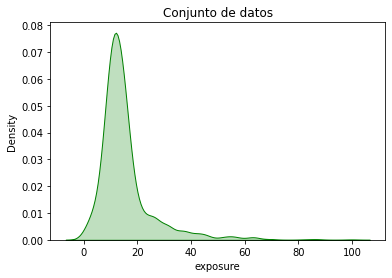

In [6]:
#Lo representamos gráficamente
sns.distplot(
    df["exposure"], 
    hist = False, 
    color = "green", 
    kde_kws = {"shade": True, "linewidth": 1})
plt.title('Conjunto de datos');

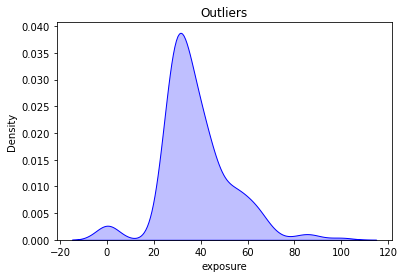

In [7]:
sns.distplot(
    outliers["exposure"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1})
plt.title('Outliers');

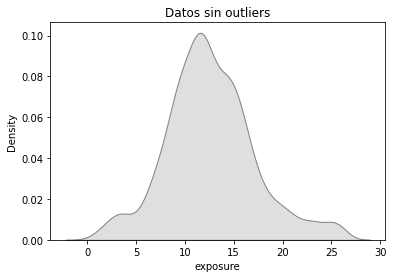

In [8]:
sns.distplot(
    df_limpio["exposure"], 
    hist = False, 
    color = "grey", 
    kde_kws = {"shade": True, "linewidth": 1})
plt.title('Datos sin outliers');

Nuestra variable respuesta no es simétrica, tiene una asimetría positiva ya que el valor del skew 2.75.
En cambio al separar los outliers notamos que la distribución tiende a la simetría y parece tener una distribución más normal. 
Los outliers son más normales que los datos en conjuntos pero sigue siendo asimetrica positiva con un valor de 0,75.

4 - ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [9]:
#Vemos a través de kurtosistest el tipo de curtosis de la variable exposure
print(f'''La curtosis del conjunto de datos es: 
{kurtosistest(df['exposure'])}''')
print ('---------------------')
print(f'''La curtosis de los outliers es: 
{kurtosistest(outliers['exposure'])}''')
print ('---------------------')
print(f'''La curtosis de los datos sin outliers es: 
{kurtosistest(df_limpio['exposure'])}''')
print ('---------------------')

La curtosis del conjunto de datos es: 
KurtosistestResult(statistic=19.016521784124464, pvalue=1.2447206461942722e-80)
---------------------
La curtosis de los outliers es: 
KurtosistestResult(statistic=4.2094496684011276, pvalue=2.55993459130919e-05)
---------------------
La curtosis de los datos sin outliers es: 
KurtosistestResult(statistic=4.156429953383866, pvalue=3.232592204540685e-05)
---------------------


La variable respuesta tanto con como sin outliers es leptocúrtica y muestra una morfología afilada

5- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [10]:
#Vemos la normalidad a través de kstest
print(f'''La normalidad del conjunto de datos es: 
{kstest(df['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los outliers es: 
{kstest(outliers['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los datos sin outliers es: 
{kstest(df_limpio['exposure'], 'norm')}''')
print ('---------------------')

La normalidad del conjunto de datos es: 
KstestResult(statistic=0.9829459870076139, pvalue=0.0)
---------------------
La normalidad de los outliers es: 
KstestResult(statistic=0.966824644549763, pvalue=1.559977630884e-312)
---------------------
La normalidad de los datos sin outliers es: 
KstestResult(statistic=0.9851781284996995, pvalue=0.0)
---------------------


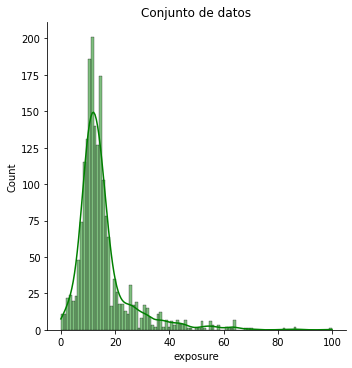

In [11]:
#Lo representamos graficamente
sns.displot(df["exposure"], kde = True, color = "green")
plt.title('Conjunto de datos');

<Figure size 576x288 with 0 Axes>

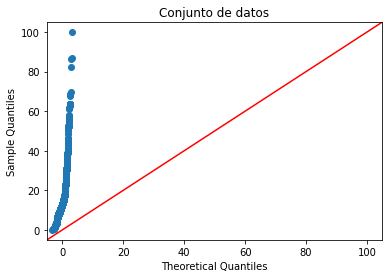

In [12]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df["exposure"], line ='45')
plt.title('Conjunto de datos');

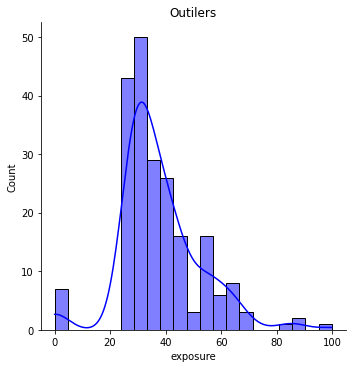

In [13]:
sns.displot(outliers["exposure"], kde = True, color = "blue")
plt.title('Outilers');

<Figure size 576x288 with 0 Axes>

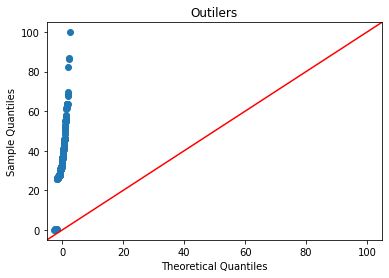

In [14]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(outliers["exposure"], line ='45')
plt.title('Outilers');

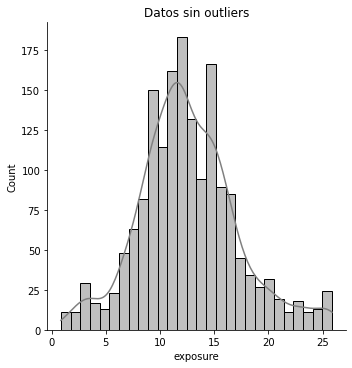

In [15]:
sns.displot(df_limpio["exposure"], kde = True, color = "grey")
plt.title('Datos sin outliers');

<Figure size 576x288 with 0 Axes>

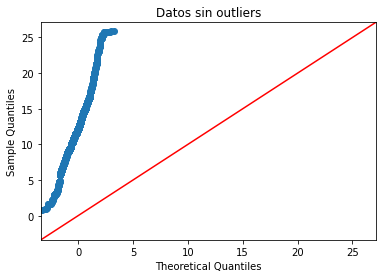

In [16]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df_limpio["exposure"], line ='45')
plt.title('Datos sin outliers');

Nuestra variable respuesta no es normal, sin embargo al quitar los outliers tiende un poco mas a la normalidad.